<a href="https://colab.research.google.com/github/khushbooekhande/WildfireDetectionUsingMachineLearning/blob/master/SmokeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

import numpy as np
import scipy as sp
import cv2
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline


classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('SmokeData/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32, 
                                                 color_mode="rgb",
                                                 class_mode = 'binary', 
                                                 shuffle=True,
                                                 seed=42)
valid_set = valid_datagen.flow_from_directory(
    'SmokeData/test',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)


Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 754 images belonging to 2 classes.
Found 305 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 1000,
                         validation_data = valid_set,
                         validation_steps = 200)

classifier.save('smokeclassifier.h5')


Epoch 1/1
500/500 [==============================] - 676s 1s/step - loss: 0.3375 - accuracy: 0.8643 - val_loss: 0.3475 - val_accuracy: 0.8590


In [0]:

def predict(imgage_path):
    test_image = image.load_img(img_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    print(training_set.class_indices)
    if result[0][0] == 1:
        prediction = 'notsmoke'
        return False
    else:
        prediction = 'smoke'
        return True

def predict_part(inp_arr_image):
    test_image = cv2.resize(inp_arr_image, (64,64))
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'notsmoke'
        return False
    else:
        prediction = 'smoke'
        return True

def plot_image(img_array):
    img = np.array(img_array, np.int32)
    plt.imshow(img)
    

def get_cells_img(np_arr_img, n=64): # considers all n X n grids
    sub_imgs = []
    for row in range((np_arr_img.shape[0]//n)):
        for col in range((np_arr_img.shape[1]//n)):
            c_0 = col*n
            c_1 = min((c_0+n), np_arr_img.shape[1])
            r_0 = row*n
            r_1 = min((r_0+n), np_arr_img.shape[0])
    #         print(c_0, c_1, " | ", r_0, r_1)
            sub_imgs.append(np_arr_img[r_0:r_1, c_0:c_1,: ])
    return sub_imgs

def get_img_array(path):
    img = image.load_img(path)
    return image.img_to_array(img)

def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    print(len(axes.flat))
    for i, ax in enumerate(axes.flat): 
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

def count_subimgs(img_arr_pred):
    smoke_cnt = 0
    for s in img_arr_pred:
            if s:
                smoke_cnt += 1

    no_smk_cnt = len(img_arr_pred) - smoke_cnt

    print("smoke: ", smoke_cnt, "non-smoke:", no_smk_cnt)


(750, 1000, 3)


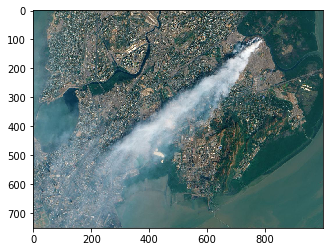

In [0]:
test_img_smoke = image.load_img('SmokeData/vald/smoke.jpg')
test_img_smoke = image.img_to_array(test_img_smoke)
print(test_img_smoke.shape)
plot_image(test_img_smoke)

(1064, 1300, 3)


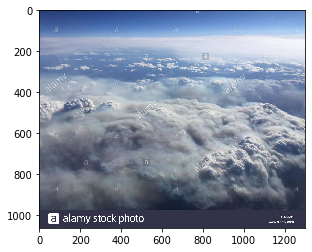

In [0]:
test_img_no_smoke = image.load_img('SmokeData/vald/no_smoke.jpg')
test_img_no_smoke = image.img_to_array(test_img_no_smoke)
print(test_img_no_smoke.shape)
plot_image(test_img_no_smoke)

(640, 640, 3)


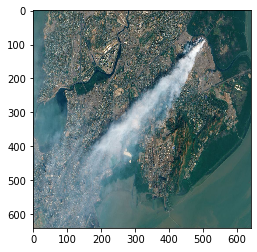

In [0]:
test_img_smoke_arr = get_img_array('SmokeData/vald/smoke.jpg')
test_img_smoke_arr = image.img_to_array(test_img_smoke_arr)
test_img_smoke_arr = cv2.resize(test_img_smoke_arr, (640, 640) )
print(test_img_smoke_arr.shape)
plot_image(test_img_smoke_arr)
test_img_smoke_arr_cells = get_cells_img(test_img_smoke_arr, n=128)
test_img_smoke_arr_pred = [predict_part(img) for img in test_img_smoke_arr_cells]

(640, 640, 3)


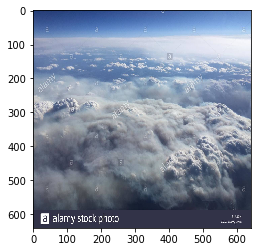

In [0]:
test_img_no_smoke_arr = get_img_array('SmokeData/vald/no_smoke.jpg')
test_img_no_smoke_arr = cv2.resize(test_img_no_smoke_arr, (640, 640) )
print(test_img_no_smoke_arr.shape)
plot_image(test_img_no_smoke_arr)
test_img_no_smoke_arr_cells = get_cells_img(test_img_no_smoke_arr, n=128)
test_img_no_smoke_arr_pred = [predict_part(img) for img in test_img_no_smoke_arr_cells]

In [0]:
count_subimgs(test_img_smoke_arr_pred)
count_subimgs(test_img_no_smoke_arr_pred)

smoke:  24 non-smoke: 1
smoke:  14 non-smoke: 11


25


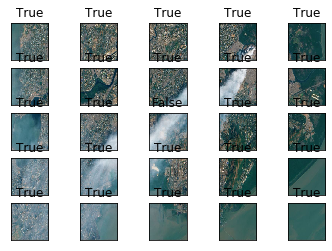

In [0]:
smoke_sub_imgs = [np.array(img, np.int32) for img in test_img_smoke_arr_cells]
plot_images(smoke_sub_imgs, test_img_smoke_arr_pred, 5, 5)

25


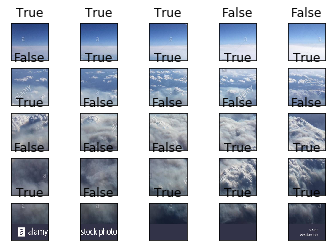

In [0]:
no_smoke_sub_imgs = [np.array(img, np.int32) for img in test_img_no_smoke_arr_cells]
plot_images(no_smoke_sub_imgs, test_img_no_smoke_arr_pred, 5, 5)